In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy as sc
import gistfile1 as gf
import time

In [2]:
folder_path_X = "/network/lustre/iss02/aramis/projects/cracknetworks/X_couple/X_couple"
folder_path_Y = "/network/lustre/iss02/aramis/projects/cracknetworks/Y_folder/Y_folder"

In [3]:
X1 = np.load(folder_path_X + "/1_1000_cpl.npy")

In [4]:
Y1 = np.load(folder_path_Y + "/1_1000_coh.npy")

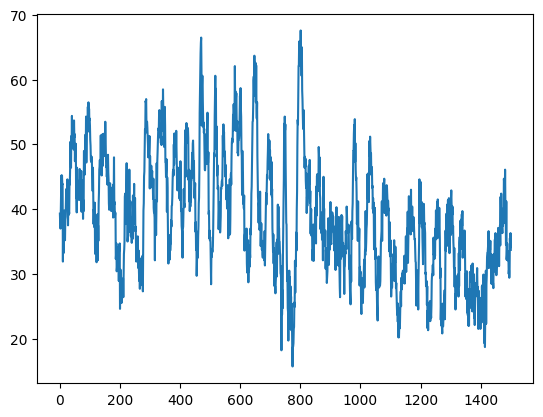

In [5]:
xa = X1[0, 0, :]
xb = X1[0, 1, :]
plt.plot(xa)
plt.show()

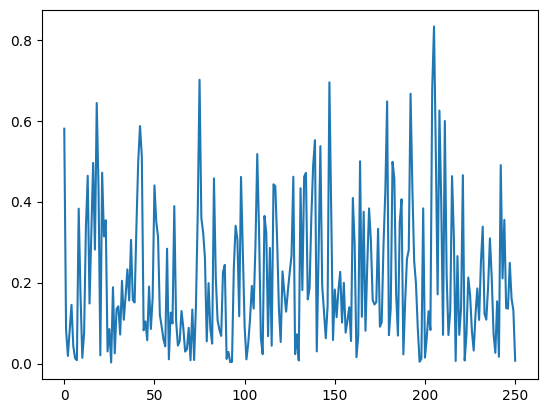

In [6]:
coh = signal.coherence(xa, xb, nperseg=500, noverlap=250)
plt.plot(coh[1])

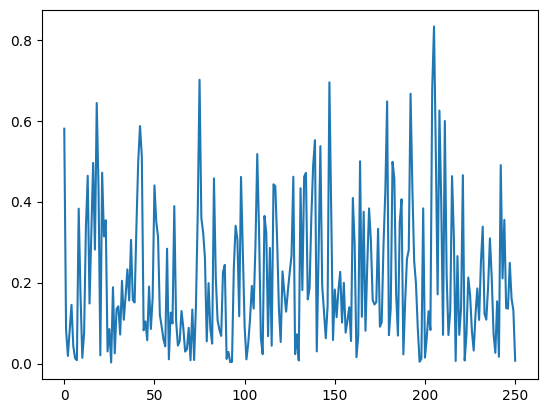

In [7]:
y = Y1[0, :]
plt.plot(y)
plt.show()

In [102]:
def crossSpectrum_Welsh(x, y, nperseg=500, overlap=250, window='hann', padding = False):

    D = nperseg - overlap
    L = nperseg
    if padding and (len(x) - L) % D != 0:
        # Zero padding
        x = np.append(x, np.zeros(L - (len(x) - L) % D))
        y = np.append(y, np.zeros(L - (len(y) - L) % D))

    cross = np.zeros(nperseg, dtype='complex128')
    ind = 0
    K = 0

    if window == 'hann':
        window = signal.windows.hann(L)
    elif window == 'hamming':
        window = signal.windows.hamming(L)
    elif window == 'blackman':
        window = signal.windows.blackman(L)
    else:
        window = signal.windows.boxcar(L)

    U = np.sum(window**2) / L
    
    while ind + L < len(x):

        xp = x[ind : ind + L] 
        yp = y[ind : ind + L] 
        xp = sc.signal.detrend(xp, type='constant')
        yp = sc.signal.detrend(yp, type='constant')

        # Do FFT
        cfx = sc.fft.fft(xp * window / L)
        cfy = sc.fft.fft(yp * window / L)

        # Get cross spectrum
        cross += cfx.conj()*cfy * (L / U)

        ind += D
        K += 1

    return cross / K


In [112]:
def crossSpectrum_periodogram(x, y):

    x = signal.detrend(x, type='constant')
    cfx = sc.fft.fft(x)
    y = signal.detrend(y, type='constant')
    cfy = sc.fft.fft(y)

    cross = cfx.conj()*cfy
    
    return cross

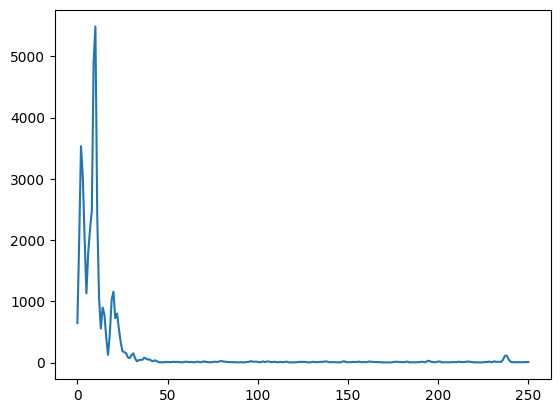

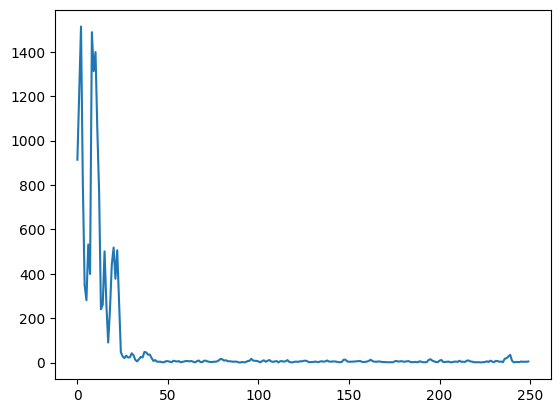

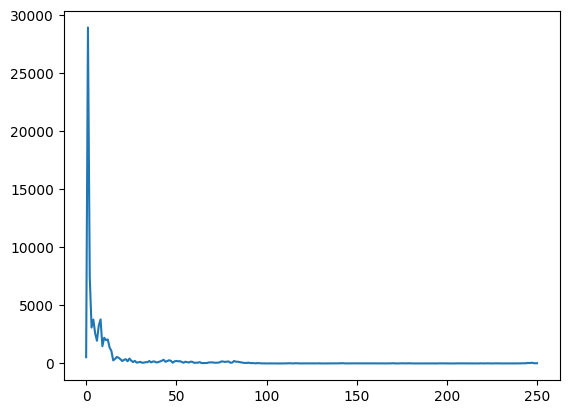

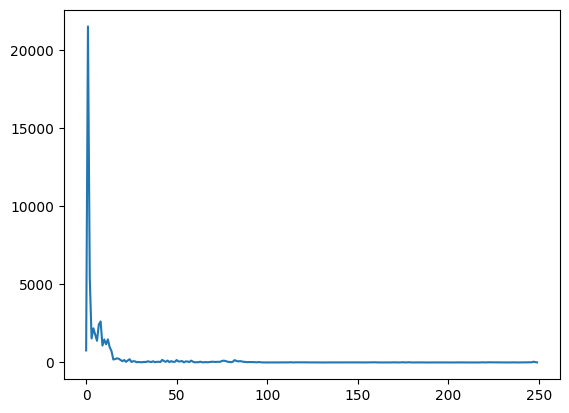

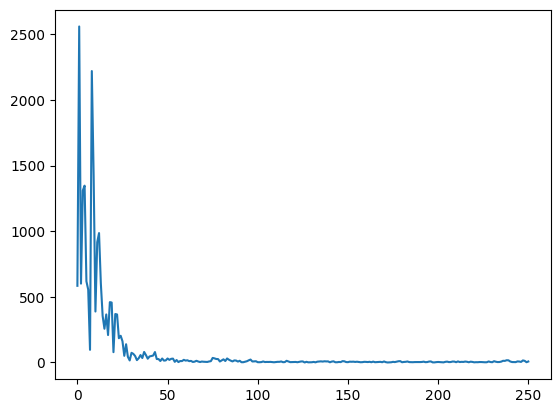

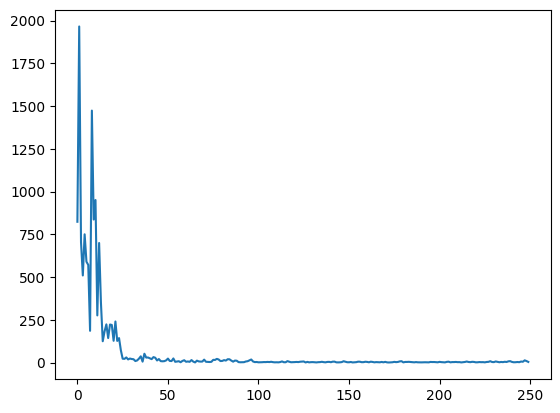

In [103]:
x = xa[:1000]
Pxx = signal.welch(x, nperseg=500, noverlap=250, window='hann')
plt.plot(Pxx[1])
plt.show()
Pxx = crossSpectrum_Welsh(x, x)
plt.plot(np.abs(Pxx)[:len(Pxx)//2])
plt.show()

x = xb[:1000]
Pxx = signal.welch(x, nperseg=500, noverlap=250, window='hann')
plt.plot(Pxx[1])
plt.show()
Pxx = crossSpectrum_Welsh(x, x)
plt.plot(np.abs(Pxx)[:len(Pxx)//2])
plt.show()

x = xa[:1000]
y = xb[:1000]
Pxy1 = signal.csd(x, y, nperseg=500, noverlap=250, window='hann')
plt.plot(np.abs(Pxy1[1]))
plt.show()
Pxy2 = crossSpectrum_Welsh(x,y, nperseg=500, overlap=250, window='hann')
plt.plot(np.abs(Pxy2)[:len(Pxy2)//2])
plt.show()


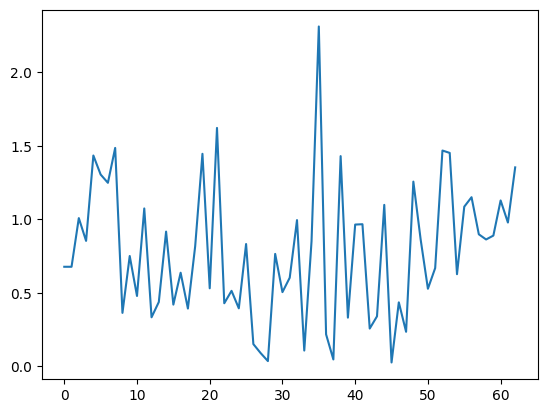

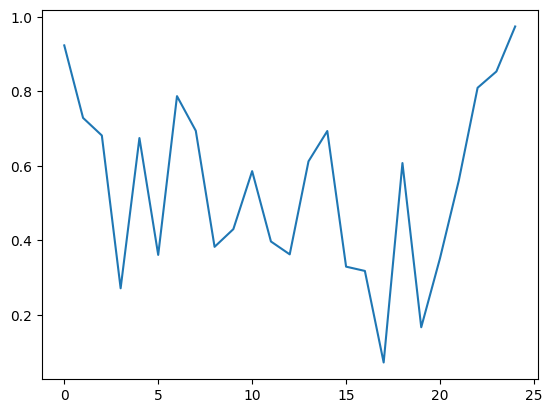

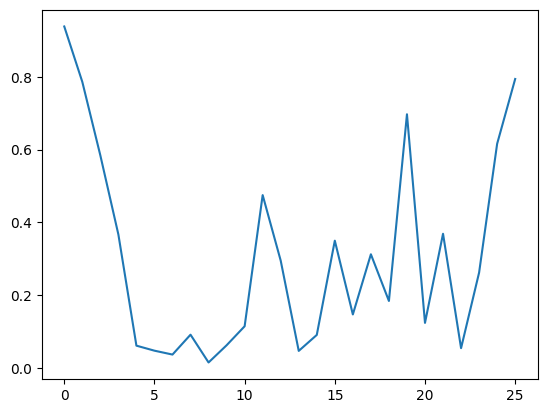

In [120]:
x = xa[:125]
y = xb[:125]
Pxy = crossSpectrum_periodogram(x, y)
Pxx = crossSpectrum_periodogram(x, y)
Pyy = crossSpectrum_periodogram(y, y)
coh = np.abs(Pxy) / np.sqrt(Pxx * Pyy)
plt.plot(coh[len(coh)//2:])
plt.show()
Pxy = crossSpectrum_Welsh(x, y, nperseg = 50, overlap = 25)
Pxx = crossSpectrum_Welsh(x, x, nperseg = 50, overlap = 25)
Pyy = crossSpectrum_Welsh(y, y, nperseg = 50, overlap = 25)
coh = np.abs(Pxy) / np.sqrt(Pxx * Pyy)
plt.plot(coh[len(coh)//2:])
plt.show()
coh = signal.coherence(x, y, nperseg=50, noverlap=25)
plt.plot(coh[1])
plt.show()

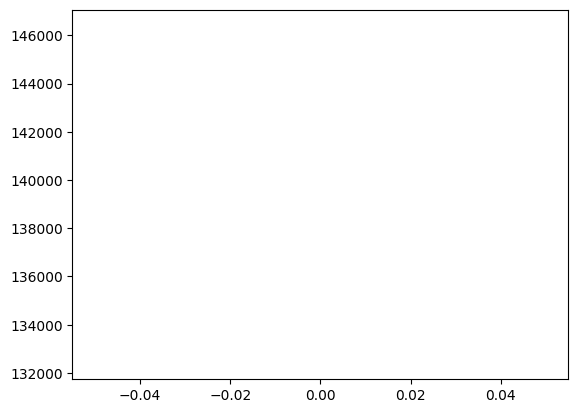

/home/aurelien.stumpf/Code/deep_env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


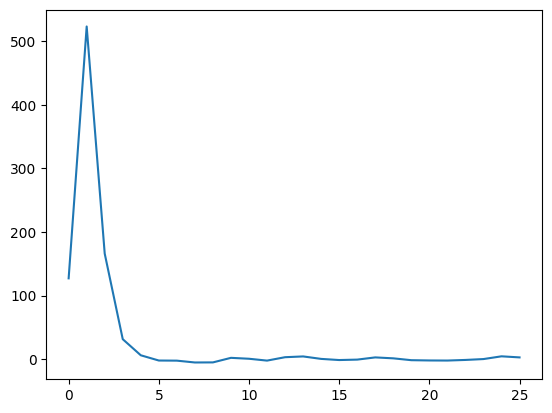

In [116]:
x = xa[:200]
y = xb[:200]

Pxy_periodogram = np.abs(crossSpectrum_periodogram(x, y))
Pxy_welsh = signal.csd(x, y, nperseg=50, noverlap=25, window='hann')

plt.plot(Pxy_periodogram[1])
plt.show()
plt.plot(Pxy_welsh[1])
plt.show()